In [1]:
import sys
sys.path.append("/home/maotx/git/LensFinder/show")
from myshow import Map, readdata

In [2]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

In [29]:
DirBase = "/data/inspur_disk03/userdir/wangcx/BASS_stack/area2/DEV_COMP_hdf5"
OutBase = "/home/maotx/git/LensFinder/show/data"
data_shape = [101, 101, 3]
#fps = glob.glob(os.path.join(DirBase, '*.hdf5'))
fp = "/data/inspur_disk03/userdir/wangcx/BASS_stack/area2/DEV_COMP_hdf5/DR2_84651_0.hdf5"

In [4]:
with open('/data/dell5/userdir/maotx/Lens/result/DEV_COMP_hdf5_lens_049_45_back/DR2_84651_0.txt') as f:
    data = f.readlines()
    data = [i[:-1].split('\t') for i in data]
    keys = np.array([i[0] for i in data])
    pred = np.array([float(i[2])/(float(i[1])+float(i[2])) for i in data])
    bool_lens = pred > 0.9
    keys = keys[bool_lens]

In [5]:
show = Map(0.15, 1, 0.3)

In [23]:
cmap = 'gray'
plt.style.use('dark_background')
params = {
    'image.cmap': 'gray',
    'xtick.top': False,
    'ytick.right': False,
    'xtick.minor.visible': False,
    'ytick.minor.visible': False,
    'xtick.major.top': False,
    'xtick.major.bottom': False,
    'ytick.major.left': False,
    'ytick.major.right': False,
}
plt.rcParams.update(params)

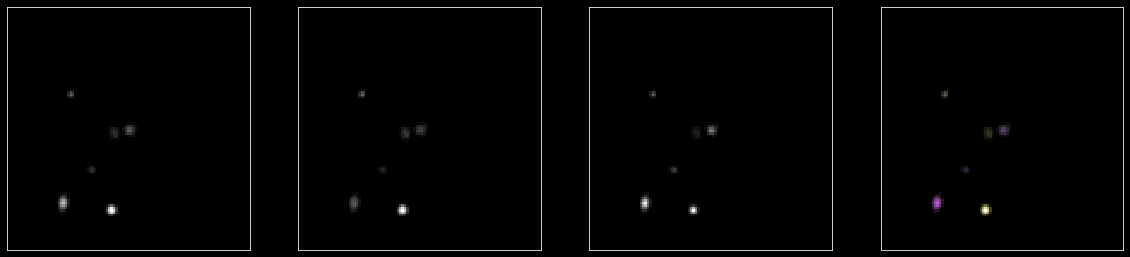

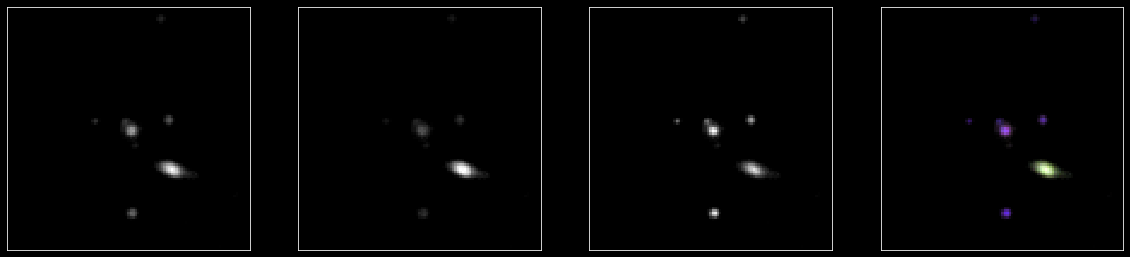

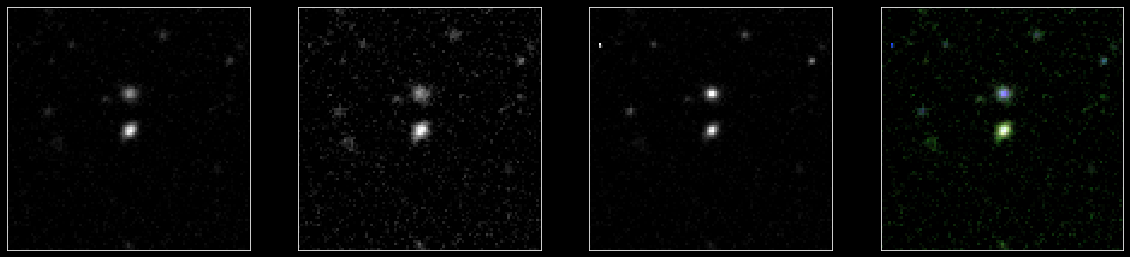

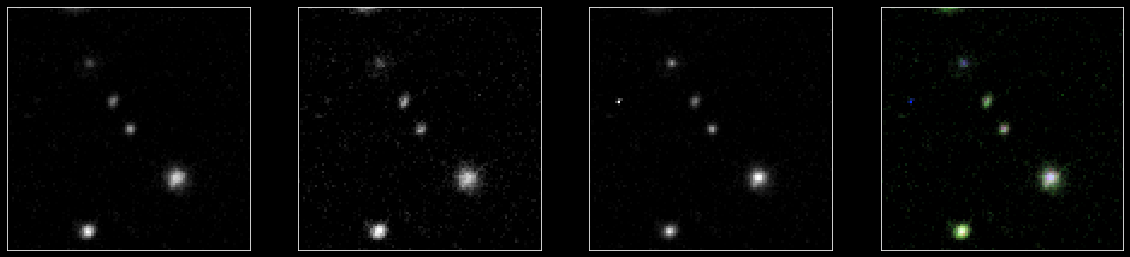

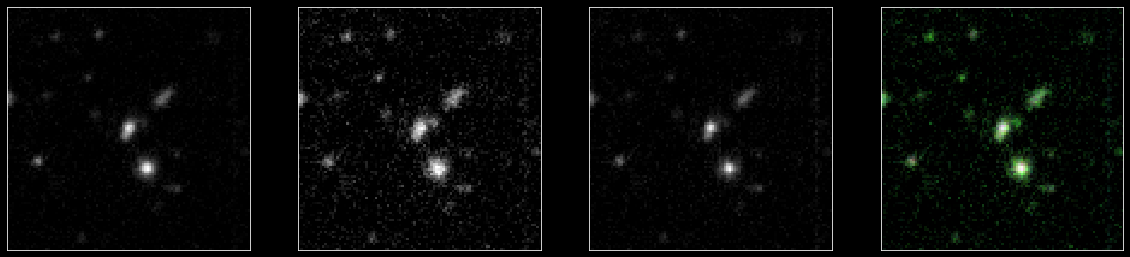

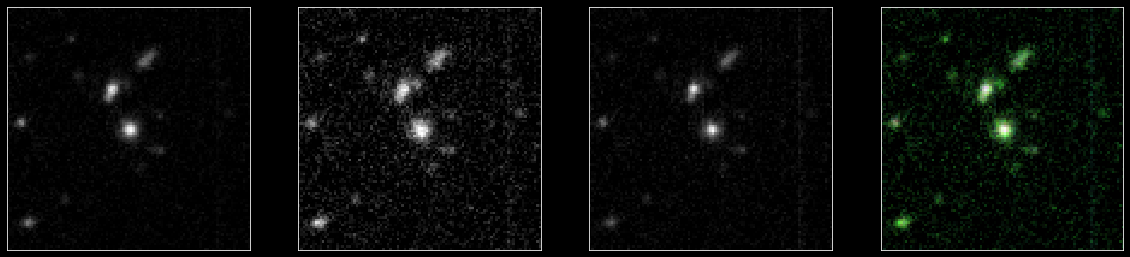

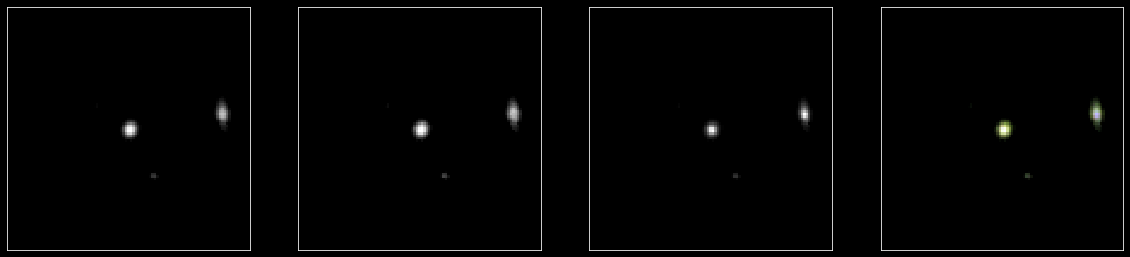

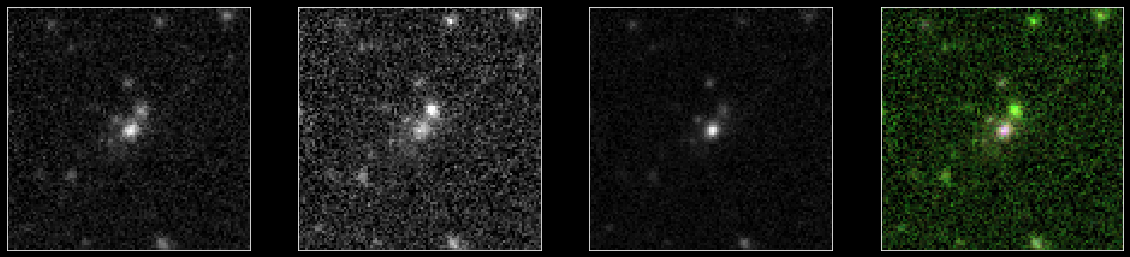

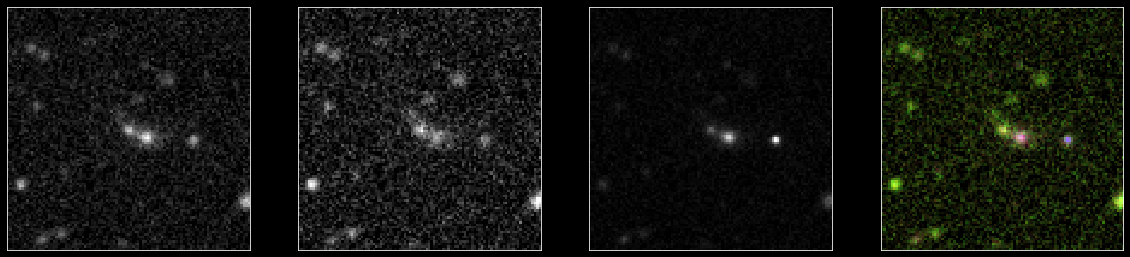

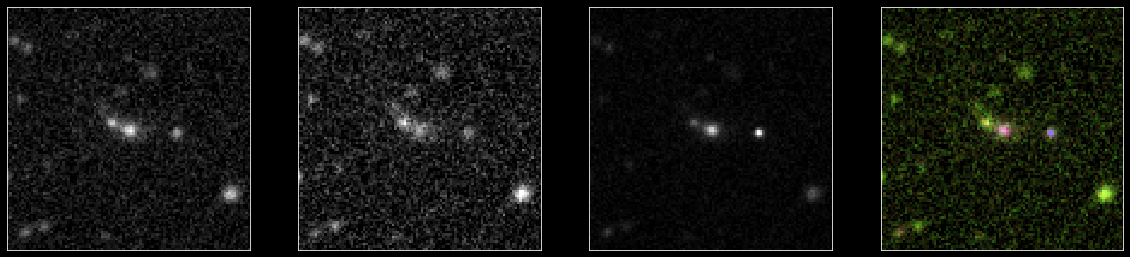

In [33]:
for i in range(len(keys)):
    key = keys[i]
    data = readdata(fp, key)
    im = show(*data)
    fig, axes = plt.subplots(1, 4, figsize=(20, 4.5))
    axes[0].imshow(im[0])
    axes[1].imshow(im[1])
    axes[2].imshow(im[2])
    axes[3].imshow(im.transpose(1, 2, 0))
    fig.savefig(os.path.join(OutBase,'{}.png'.format(key)))

In [55]:
%matplotlib inline

In [56]:
ones = np.ones([20,20])
one2 = ones.copy()
one2[:10,:10] +=12

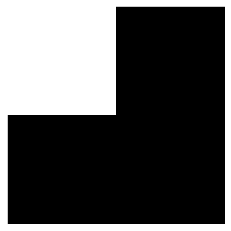

In [57]:
fig, ax = plt.subplots(1,1)
im = ax.imshow(one2)

In [58]:
im.set_data(ones)
fig.canvas.draw()